# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [17]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


# Creating data to view and fit

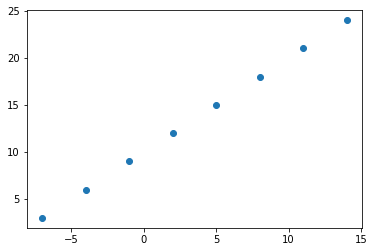

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [19]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [20]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [21]:
X[0], y[0]

(-7.0, 3.0)

In [22]:
X[1], y[1]

(-4.0, 6.0)

In [23]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [24]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [25]:
X[0].ndim

0

In [26]:
X[0], y[0]

(-7.0, 3.0)

In [32]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [28]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

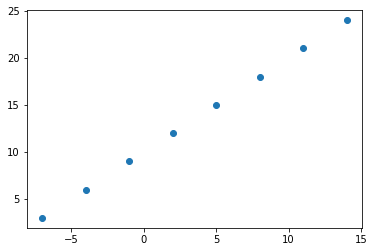

In [29]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve th epatterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fiting a model** - letting the model try to find patterns between X & y (features and labels).

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                                                          
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient decent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 580ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [34]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [36]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])

In [37]:
y_pred

array([[12.716021]], dtype=float32)

In [38]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model

In [39]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train the model longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 249ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [40]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [41]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [48]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1),                    
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

# 3. Fit the model (this time we'll train the model longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 415ms/step - loss: 13.3482 - mae: 13.3482
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1297 - mae: 13.1297
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9086 - mae: 12.9086
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6842 - mae: 12.6842
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 12.4556 - mae: 12.4556
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2222 - mae: 12.2222
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9834 - mae: 11.9834
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7386 - mae: 11.7386
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4871 - mae: 11.4871
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2284 - mae: 11.2284
Epoch 11/100
1/1 [==============================] - 0s 

In [49]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[27.893682]], dtype=float32)

In [46]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['mae'])

# 3. Fit the model (this time we'll train the model longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 310ms/step - loss: 10.3054 - mae: 10.3054
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3050 - mae: 10.3050
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3045 - mae: 10.3045
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3041 - mae: 10.3041
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3036 - mae: 10.3036
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3032 - mae: 10.3032
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3027 - mae: 10.3027
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3023 - mae: 10.3023
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3018 - mae: 10.3018
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3014 - mae: 10.3014
Epoch 11/100
1/1 [==============================] - 0s 3m

In [51]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with the extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 293ms/step - loss: 12.7137 - mae: 12.7137
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0739 - mae: 12.0739
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4296 - mae: 11.4296
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7726 - mae: 10.7726
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0986 - mae: 10.0986
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.3992 - mae: 9.3992
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6669 - mae: 8.6669
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8932 - mae: 7.8932
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0783 - mae: 7.0783
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.2116 - mae: 6.2116
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

In [52]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [54]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [56]:
# Let's try to make a prediction
model.predict([17.0])

array([[31.254612]], dtype=float32)

In [61]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),                             
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model (this time we'll train the model longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 356ms/step - loss: 13.4370 - mae: 13.4370
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.7093 - mae: 12.7093
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9862 - mae: 11.9862
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2648 - mae: 11.2648
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5425 - mae: 10.5425
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8168 - mae: 9.8168
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0853 - mae: 9.0853
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.3451 - mae: 8.3451
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5932 - mae: 7.5932
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8588 - mae: 6.8588
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

In [63]:
model.predict([17.0])

array([[26.571156]], dtype=float32)

# Evaluting a model